# Preprocessing

In this section we will pre-process the dataset.
The steps that we will take are as follows:
- Convert text to lower case
- Remove stopwords
- We will stem the words using SnowballStemmer
- Remove common words in all classes
- Remove blacklist words

In [5]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

nltk.download("stopwords", download_dir="./.utils/")

[nltk_data] Downloading package stopwords to ./.utils/...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
df['cleaned_resume'] = df['Resume'].apply(lambda x: x.lower())

In [18]:
stop_words = set(stopwords.words('english'))
df['cleaned_resume'] = df['cleaned_resume'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [19]:
stemmer = SnowballStemmer('english')
df['cleaned_resume'] = df['cleaned_resume'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [25]:
cv = CountVectorizer()
word_counts = cv.fit_transform(df['cleaned_resume'])
word_counts_df = pd.DataFrame(word_counts.toarray(), columns=list(cv.get_feature_names_out()))
word_counts_df['category'] = df['Category']
words_in_all_classes = set(word_counts_df.drop('category', axis=1).columns[word_counts_df.drop('category', axis=1).sum(axis=0) == len(word_counts_df)])
df['cleaned_resume'] = df['cleaned_resume'].apply(lambda x: ' '.join([word for word in x.split() if word not in words_in_all_classes]))


In [28]:
blacklist = ['year', 'experience', 'month', 'detail', 'experienc']

# Remove blacklisted words from cleaned resumes
df['cleaned_resume'] = df['cleaned_resume'].apply(lambda x: ' '.join([word for word in x.split() if word not in blacklist]))

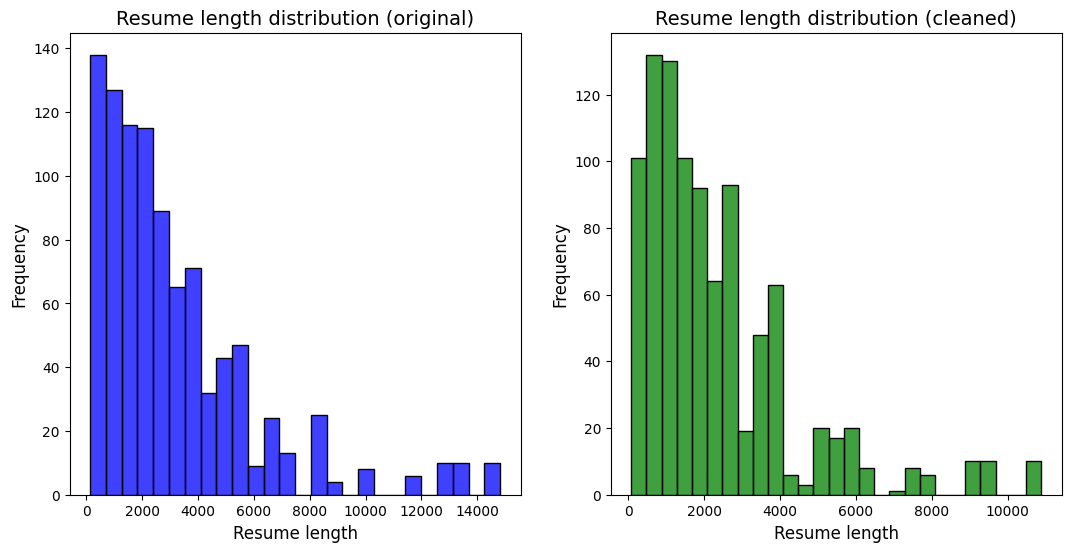

In [32]:
df['length'] = df['Resume'].str.len()
df['length_Clean'] = df['cleaned_resume'].str.len()

# Plot the distributions
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12.8, 6))

# Plot the original resume length distribution in blue
sns.histplot(df['length'], ax=ax1, color='blue', kde=False)
ax1.set_title('Resume length distribution (original)', fontsize=14)
ax1.set_xlabel('Resume length', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)

# Plot the cleaned resume length distribution in green
sns.histplot(df['length_Clean'], ax=ax2, color='green', kde=False)
ax2.set_title('Resume length distribution (cleaned)', fontsize=14)
ax2.set_xlabel('Resume length', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12);